# Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingRegressor
from prettytable import PrettyTable
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> NIO Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [2]:
data = yf.Ticker("NIO")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Exploratory Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [3]:
data.head()

Open   High   Low  Close     Volume  Dividends  Stock Splits
Date                                                                     
2018-09-12   6.00   6.93  5.35   6.60   66849000          0             0
2018-09-13   6.62  12.69  6.52  11.60  158346500          0             0
2018-09-14  12.66  13.80  9.22   9.90  172473600          0             0
2018-09-17   9.61   9.75  8.50   8.50   56323900          0             0
2018-09-18   8.73   9.10  7.67   7.68   41827600          0             0

### Five last records of data

In [4]:
data.tail()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2021-07-15  43.259998  44.770000  42.680000  43.680000  55860400          0   
2021-07-16  43.849998  44.400002  42.400002  42.799999  49803000          0   
2021-07-19  41.490002  43.669998  40.480000  43.349998  65290100          0   
2021-07-20  43.599998  44.410000  42.430000  44.169998  37860600          0   
2021-07-21  44.099998  47.369999  44.000000  46.980000  45528171          0   

            Stock Splits  
Date                      
2021-07-15             0  
2021-07-16             0  
2021-07-19             0  
2021-07-20             0  
2021-07-21             0

### Coloumns/features in data

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 719


### Shape of data

In [7]:
data.shape

(719, 7)

### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2018-09-12 to 2021-07-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          719 non-null    float64
 1   High          719 non-null    float64
 2   Low           719 non-null    float64
 3   Close         719 non-null    float64
 4   Volume        719 non-null    int64  
 5   Dividends     719 non-null    int64  
 6   Stock Splits  719 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 44.9 KB


### Data types of all coloumns

In [9]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

### Checking missing Values

In [10]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [11]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [12]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [14]:
data.describe()

Open        High         Low       Close        Volume  \
count  719.000000  719.000000  719.000000  719.000000  7.190000e+02   
mean    16.406801   16.971127   15.783825   16.412490  6.944019e+07   
std     17.970693   18.523438   17.303862   17.955069  7.270526e+07   
min      1.190000    1.450000    1.190000    1.320000  5.111000e+06   
25%      3.430000    3.530000    3.315000    3.425000  2.208330e+07   
50%      6.700000    6.930000    6.510000    6.710000  4.956880e+07   
75%     31.665000   32.830000   30.370000   31.605000  8.448145e+07   
max     64.949997   66.989998   62.189999   62.840000  5.771851e+08   

       Dividends  Stock Splits  
count      719.0         719.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

### Data Correlation

In [15]:
aa=data[['Close','Open','Low','High','Volume']]
rets=aa.pct_change()
cor=rets.corr(method='pearson')
cor

Close      Open       Low      High    Volume
Close   1.000000  0.245389  0.603527  0.798913  0.371675
Open    0.245389  1.000000  0.767348  0.554598  0.142627
Low     0.603527  0.767348  1.000000  0.647387  0.062675
High    0.798913  0.554598  0.647387  1.000000  0.550124
Volume  0.371675  0.142627  0.062675  0.550124  1.000000

<AxesSubplot:>

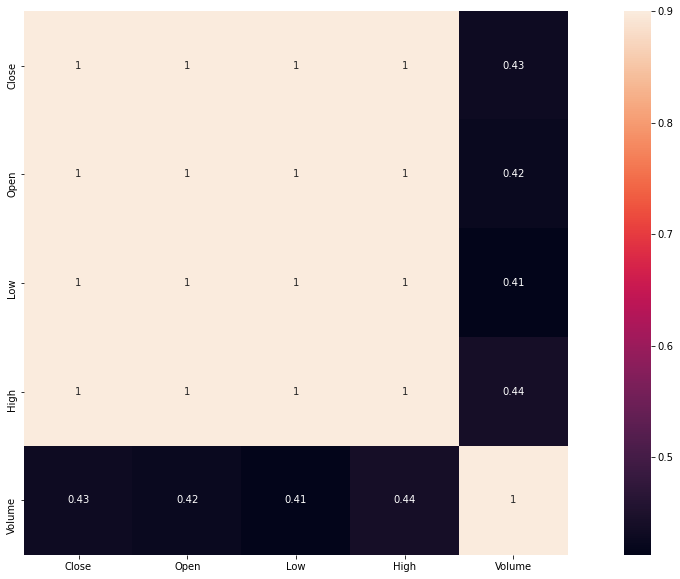

In [16]:
corrmat = aa.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True, annot = True)

### Correlation with Close 

<AxesSubplot:title={'center':'Correlation of Close'}>

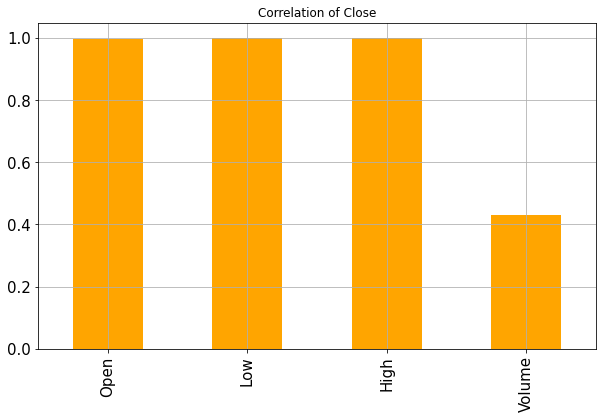

In [17]:
a = aa.drop(columns=['Close'], axis=1)
a.corrwith(aa['Close']).plot.bar(
                figsize = (10, 6), title = "Correlation of Close", fontsize = 15,
                rot = 90, grid = True, color='orange')

### Spliting date into day, month and year

In [18]:
data['date'] = data.index
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Year'] = data['date'].dt.year

### Close price with respect to year 

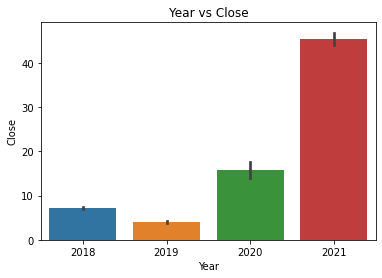

In [19]:
sns.barplot(x='Year', y='Close', data=data).set(title='Year vs Close')
plt.show()

### Close price with respect to Month 

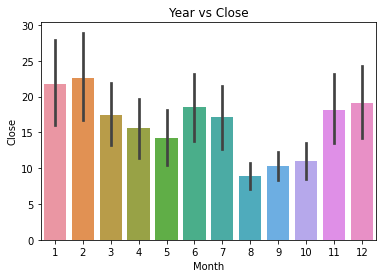

In [20]:
sns.barplot(x='Month', y='Close', data=data).set(title='Year vs Close')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### CLOSE price values plot

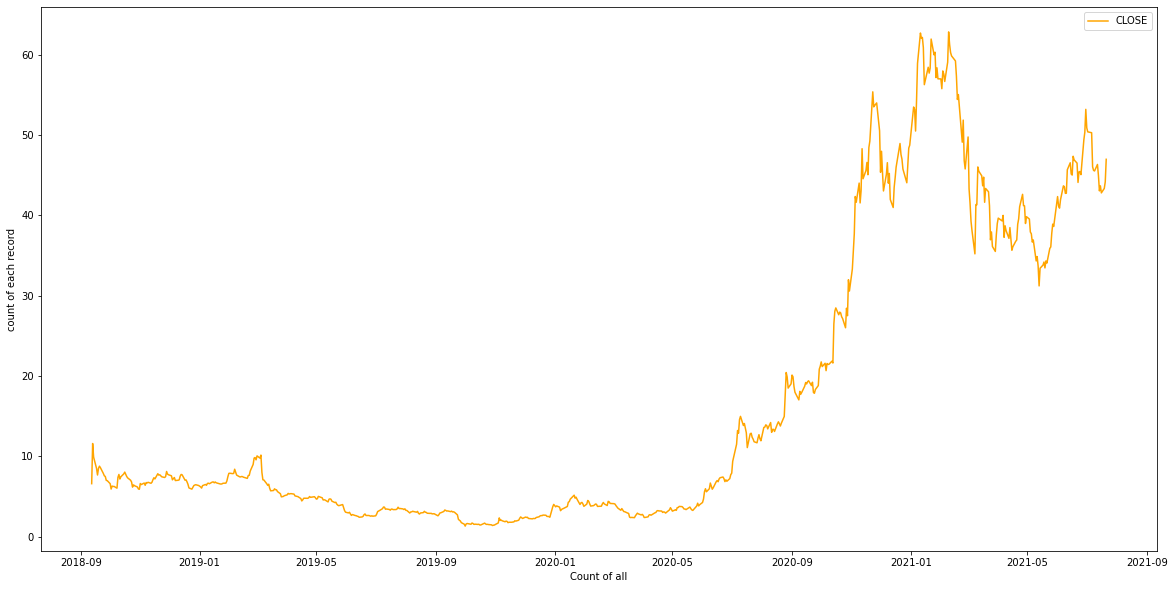

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data.index, data['Close'].values,color='orange',label='CLOSE')
plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [22]:
def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [23]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

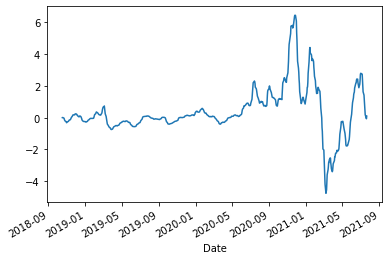

In [24]:
data['MACD'].plot()

### Moving average features

In [25]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [27]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [28]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [29]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [30]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [31]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [32]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [33]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [34]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [35]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [36]:
data=data.replace(np.NaN, 0)
data

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2018-09-12   6.000000   6.930000   5.350000   6.600000   66849000          0   
2018-09-13   6.620000  12.690000   6.520000  11.600000  158346500          0   
2018-09-14  12.660000  13.800000   9.220000   9.900000  172473600          0   
2018-09-17   9.610000   9.750000   8.500000   8.500000   56323900          0   
2018-09-18   8.730000   9.100000   7.670000   7.680000   41827600          0   
...               ...        ...        ...        ...        ...        ...   
2021-07-15  43.259998  44.770000  42.680000  43.680000   55860400          0   
2021-07-16  43.849998  44.400002  42.400002  42.799999   49803000          0   
2021-07-19  41.490002  43.669998  40.480000  43.349998   65290100          0   
2021-07-20  43.599998  44.410000  42.430000  44.169998   37860600          0   
2021-07-21  44.099998  47.369999  44.000000  46.980000   45528171          0   

            Stock Splits       date  Month  Day  ...  Aroon_Oscillator  \
Date                                             ...                     
2018-09-12             0 2018-09-12      9   12  ...               0.0   
2018-09-13             0 2018-09-13      9   13  ...               0.0   
2018-09-14             0 2018-09-14      9   14  ...               0.0   
2018-09-17             0 2018-09-17      9   17  ...               0.0   
2018-09-18             0 2018-09-18      9   18  ...               0.0   
...                  ...        ...    ...  ...  ...               ...   
2021-07-15             0 2021-07-15      7   15  ...              60.0   
2021-07-16             0 2021-07-16      7   16  ...              60.0   
2021-07-19             0 2021-07-19      7   19  ...             -40.0   
2021-07-20             0 2021-07-20      7   20  ...             -44.0   
2021-07-21             0 2021-07-21      7   21  ...             -44.0   

                  ATR    UpMove  DownMove  Zero    PlusDM   MinusDM    plusDI  \
Date                                                                            
2018-09-12   0.000000  0.000000  0.000000     0  0.000000  0.000000  0.000000   
2018-09-13   0.000000  5.760000 -1.170000     0  5.760000  0.000000  0.000000   
2018-09-14   0.000000  1.110001 -2.700000     0  1.110001  0.000000  0.000000   
2018-09-17   0.000000 -4.050000  0.720000     0  0.000000  0.720000  0.000000   
2018-09-18   0.000000 -0.650000  0.830000     0  0.000000  0.830000  0.000000   
...               ...       ...       ...   ...       ...       ...       ...   
2021-07-15  47.485715 -0.399998  0.000000     0  0.000000  0.000000  0.929215   
2021-07-16  47.323572 -0.369999  0.279999     0  0.000000  0.279999  0.805320   
2021-07-19  46.891429 -0.730003  1.920002     0  0.000000  1.920002  0.697944   
2021-07-20  46.450714  0.740002 -1.950001     0  0.740002  0.000000  0.817296   
2021-07-21  46.006428  2.959999 -1.570000     0  2.959999  0.000000  1.566174   

             minusDI        ADX  
Date                             
2018-09-12  0.000000   0.000000  
2018-09-13  0.000000   0.000000  
2018-09-14  0.000000   0.000000  
2018-09-17  0.000000   0.000000  
2018-09-18  0.000000   0.000000  
...              ...        ...  
2021-07-15  1.661252  27.595287  
2021-07-16  1.518641  28.008478  
2021-07-19  1.862098  30.337221  
2021-07-20  1.613819  30.660745  
2021-07-21  1.398643  27.326067  

[719 rows x 33 columns]

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [37]:
X=data.drop(columns=['Close','date'])
X

Open       High        Low     Volume  Dividends  \
Date                                                                
2018-09-12   6.000000   6.930000   5.350000   66849000          0   
2018-09-13   6.620000  12.690000   6.520000  158346500          0   
2018-09-14  12.660000  13.800000   9.220000  172473600          0   
2018-09-17   9.610000   9.750000   8.500000   56323900          0   
2018-09-18   8.730000   9.100000   7.670000   41827600          0   
...               ...        ...        ...        ...        ...   
2021-07-15  43.259998  44.770000  42.680000   55860400          0   
2021-07-16  43.849998  44.400002  42.400002   49803000          0   
2021-07-19  41.490002  43.669998  40.480000   65290100          0   
2021-07-20  43.599998  44.410000  42.430000   37860600          0   
2021-07-21  44.099998  47.369999  44.000000   45528171          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2018-09-12             0      9   12  2018      0.000000  ...   
2018-09-13             0      9   13  2018      0.000000  ...   
2018-09-14             0      9   14  2018      0.000000  ...   
2018-09-17             0      9   17  2018      0.000000  ...   
2018-09-18             0      9   18  2018      0.000000  ...   
...                  ...    ...  ...   ...           ...  ...   
2021-07-15             0      7   15  2021      8.032128  ...   
2021-07-16             0      7   16  2021      3.142166  ...   
2021-07-19             0      7   19  2021     19.590434  ...   
2021-07-20             0      7   20  2021     25.187701  ...   
2021-07-21             0      7   21  2021     44.368596  ...   

            Aroon_Oscillator        ATR    UpMove  DownMove  Zero    PlusDM  \
Date                                                                          
2018-09-12               0.0   0.000000  0.000000  0.000000     0  0.000000   
2018-09-13               0.0   0.000000  5.760000 -1.170000     0  5.760000   
2018-09-14               0.0   0.000000  1.110001 -2.700000     0  1.110001   
2018-09-17               0.0   0.000000 -4.050000  0.720000     0  0.000000   
2018-09-18               0.0   0.000000 -0.650000  0.830000     0  0.000000   
...                      ...        ...       ...       ...   ...       ...   
2021-07-15              60.0  47.485715 -0.399998  0.000000     0  0.000000   
2021-07-16              60.0  47.323572 -0.369999  0.279999     0  0.000000   
2021-07-19             -40.0  46.891429 -0.730003  1.920002     0  0.000000   
2021-07-20             -44.0  46.450714  0.740002 -1.950001     0  0.740002   
2021-07-21             -44.0  46.006428  2.959999 -1.570000     0  2.959999   

             MinusDM    plusDI   minusDI        ADX  
Date                                                 
2018-09-12  0.000000  0.000000  0.000000   0.000000  
2018-09-13  0.000000  0.000000  0.000000   0.000000  
2018-09-14  0.000000  0.000000  0.000000   0.000000  
2018-09-17  0.720000  0.000000  0.000000   0.000000  
2018-09-18  0.830000  0.000000  0.000000   0.000000  
...              ...       ...       ...        ...  
2021-07-15  0.000000  0.929215  1.661252  27.595287  
2021-07-16  0.279999  0.805320  1.518641  28.008478  
2021-07-19  1.920002  0.697944  1.862098  30.337221  
2021-07-20  0.000000  0.817296  1.613819  30.660745  
2021-07-21  0.000000  1.566174  1.398643  27.326067  

[719 rows x 31 columns]

### Taking target as output

In [38]:
y=data['Close']
y

Date
2018-09-12     6.600000
2018-09-13    11.600000
2018-09-14     9.900000
2018-09-17     8.500000
2018-09-18     7.680000
                ...    
2021-07-15    43.680000
2021-07-16    42.799999
2021-07-19    43.349998
2021-07-20    44.169998
2021-07-21    46.980000
Name: Close, Length: 719, dtype: float64

### Spliting the data into training and Testing

In [39]:
X_train = X[:int(0.9*(len(X)))]
X_test = X[int(0.9*(len(X))):]

y_train = y[:int(0.9*(len(y)))]
y_test = y[int(0.9*(len(y))):]

### First 90% data as training 

In [40]:
X_train

Open       High        Low     Volume  Dividends  \
Date                                                                
2018-09-12   6.000000   6.930000   5.350000   66849000          0   
2018-09-13   6.620000  12.690000   6.520000  158346500          0   
2018-09-14  12.660000  13.800000   9.220000  172473600          0   
2018-09-17   9.610000   9.750000   8.500000   56323900          0   
2018-09-18   8.730000   9.100000   7.670000   41827600          0   
...               ...        ...        ...        ...        ...   
2021-04-01  41.560001  42.060001  39.250000  116305500          0   
2021-04-05  40.540001  40.650002  38.720001   71418400          0   
2021-04-06  38.830002  40.389999  38.419998   67969400          0   
2021-04-07  39.700001  39.849998  36.950001   80022800          0   
2021-04-08  37.619999  39.180000  37.470001   63692000          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2018-09-12             0      9   12  2018      0.000000  ...   
2018-09-13             0      9   13  2018      0.000000  ...   
2018-09-14             0      9   14  2018      0.000000  ...   
2018-09-17             0      9   17  2018      0.000000  ...   
2018-09-18             0      9   18  2018      0.000000  ...   
...                  ...    ...  ...   ...           ...  ...   
2021-04-01             0      4    1  2021     46.053698  ...   
2021-04-05             0      4    5  2021     45.540321  ...   
2021-04-06             0      4    6  2021     54.446459  ...   
2021-04-07             0      4    7  2021     30.965909  ...   
2021-04-08             0      4    8  2021     44.507577  ...   

            Aroon_Oscillator        ATR    UpMove  DownMove  Zero    PlusDM  \
Date                                                                          
2018-09-12               0.0   0.000000  0.000000  0.000000     0  0.000000   
2018-09-13               0.0   0.000000  5.760000 -1.170000     0  5.760000   
2018-09-14               0.0   0.000000  1.110001 -2.700000     0  1.110001   
2018-09-17               0.0   0.000000 -4.050000  0.720000     0  0.000000   
2018-09-18               0.0   0.000000 -0.650000  0.830000     0  0.000000   
...                      ...        ...       ...       ...   ...       ...   
2021-04-01             -24.0  40.371428  2.810001 -1.799999     0  2.810001   
2021-04-05             -16.0  39.970000 -1.410000  0.529999     0  0.000000   
2021-04-06             -16.0  39.707142 -0.260002  0.300003     0  0.000000   
2021-04-07             -12.0  39.172143 -0.540001  1.469997     0  0.000000   
2021-04-08              24.0  38.962857 -0.669998 -0.520000     0  0.000000   

             MinusDM    plusDI   minusDI        ADX  
Date                                                 
2018-09-12  0.000000  0.000000  0.000000   0.000000  
2018-09-13  0.000000  0.000000  0.000000   0.000000  
2018-09-14  0.000000  0.000000  0.000000   0.000000  
2018-09-17  0.720000  0.000000  0.000000   0.000000  
2018-09-18  0.830000  0.000000  0.000000   0.000000  
...              ...       ...       ...        ...  
2021-04-01  0.000000  1.991249  1.817132  37.539274  
2021-04-05  0.529999  1.725749  1.751647  32.633337  
2021-04-06  0.300003  1.495649  1.618832  28.809583  
2021-04-07  1.469997  1.296229  1.903343  27.498284  
2021-04-08  0.000000  1.123399  1.649564  26.361825  

[647 rows x 31 columns]

### Latest 10% data as testing 

In [41]:
X_test

Open       High        Low     Volume  Dividends  \
Date                                                                
2021-04-09  38.349998  38.360001  37.009998   69272700          0   
2021-04-12  37.959999  38.000000  36.759998   53428100          0   
2021-04-13  37.480000  38.660000  37.330002   62005700          0   
2021-04-14  39.230000  39.330002  36.790001   78454000          0   
2021-04-15  37.020000  37.060001  34.560001  100437400          0   
...               ...        ...        ...        ...        ...   
2021-07-15  43.259998  44.770000  42.680000   55860400          0   
2021-07-16  43.849998  44.400002  42.400002   49803000          0   
2021-07-19  41.490002  43.669998  40.480000   65290100          0   
2021-07-20  43.599998  44.410000  42.430000   37860600          0   
2021-07-21  44.099998  47.369999  44.000000   45528171          0   

            Stock Splits  Month  Day  Year  stochastic_k  ...  \
Date                                                      ...   
2021-04-09             0      4    9  2021     39.015136  ...   
2021-04-12             0      4   12  2021     34.467609  ...   
2021-04-13             0      4   13  2021     55.583111  ...   
2021-04-14             0      4   14  2021     37.468982  ...   
2021-04-15             0      4   15  2021     20.595528  ...   
...                  ...    ...  ...   ...           ...  ...   
2021-07-15             0      7   15  2021      8.032128  ...   
2021-07-16             0      7   16  2021      3.142166  ...   
2021-07-19             0      7   19  2021     19.590434  ...   
2021-07-20             0      7   20  2021     25.187701  ...   
2021-07-21             0      7   21  2021     44.368596  ...   

            Aroon_Oscillator        ATR    UpMove  DownMove  Zero    PlusDM  \
Date                                                                          
2021-04-09              24.0  38.589285 -0.820000  0.460003     0  0.000000   
2021-04-12              24.0  38.175000 -0.360001  0.250000     0  0.000000   
2021-04-13             -36.0  37.982143  0.660000 -0.570004     0  0.660000   
2021-04-14             -36.0  37.986428  0.670002  0.540001     0  0.670002   
2021-04-15             -36.0  37.823571 -2.270000  2.230000     0  0.000000   
...                      ...        ...       ...       ...   ...       ...   
2021-07-15              60.0  47.485715 -0.399998  0.000000     0  0.000000   
2021-07-16              60.0  47.323572 -0.369999  0.279999     0  0.000000   
2021-07-19             -40.0  46.891429 -0.730003  1.920002     0  0.000000   
2021-07-20             -44.0  46.450714  0.740002 -1.950001     0  0.740002   
2021-07-21             -44.0  46.006428  2.959999 -1.570000     0  2.959999   

             MinusDM    plusDI   minusDI        ADX  
Date                                                 
2021-04-09  0.460003  0.973612  1.588562  26.047060  
2021-04-12  0.250000  0.843797  1.464071  26.157649  
2021-04-13  0.000000  0.962979  1.268861  24.497349  
2021-04-14  0.000000  1.069754  1.099680  21.414960  
2021-04-15  2.230000  0.927120  1.739161  22.620426  
...              ...       ...       ...        ...  
2021-07-15  0.000000  0.929215  1.661252  27.595287  
2021-07-16  0.279999  0.805320  1.518641  28.008478  
2021-07-19  1.920002  0.697944  1.862098  30.337221  
2021-07-20  0.000000  0.817296  1.613819  30.660745  
2021-07-21  0.000000  1.566174  1.398643  27.326067  

[72 rows x 31 columns]

### Converting the input features and target into array

In [42]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

### Features Normalization

In [43]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

scaler = MinMaxScaler()
scaler.fit(X_test)
X_test=scaler.transform(X_test)

# --------------------------------------------------------------------------------------------------

# Random Forest Model

In [44]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)
RF

RandomForestRegressor()

# Evaluation Measures on Test data

# R2

In [45]:
y_pred_test = RF.predict(X_test)
rf_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(rf_test_rs,3))

R Squared :  -8.743


# MSE

In [46]:
rf_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(rf_test_mse,3))

Mean Squared Error:  249.309


# MAE

In [47]:
rf_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(rf_test_MAE,3))

Mean Absolute Error:  14.09


# Predictions and Actual Stock Price

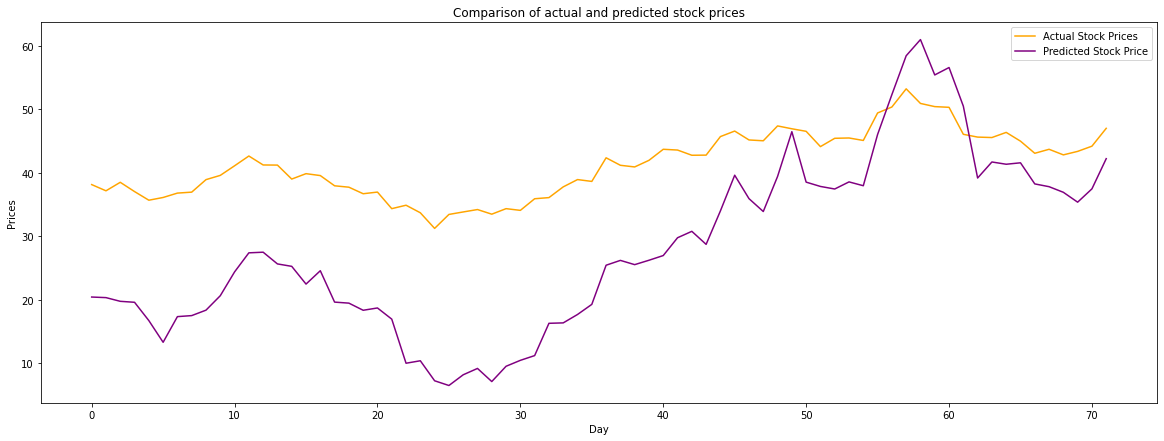

In [48]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='purple',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# XGBoost Model

In [49]:
XGB=XGBRegressor()
XGB= XGB.fit(X_train, y_train)
XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation Measures on Test data

# R2

In [50]:
y_pred_test = XGB.predict(X_test)
xgb_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(xgb_test_rs,3))

R Squared :  -10.104


# MSE

In [51]:
XGB_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(XGB_test_mse,3))

Mean Squared Error:  284.143


# MAE

In [52]:
XGB_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(XGB_test_MAE,3))

Mean Absolute Error:  14.604


# Predictions and Actual Stock Price

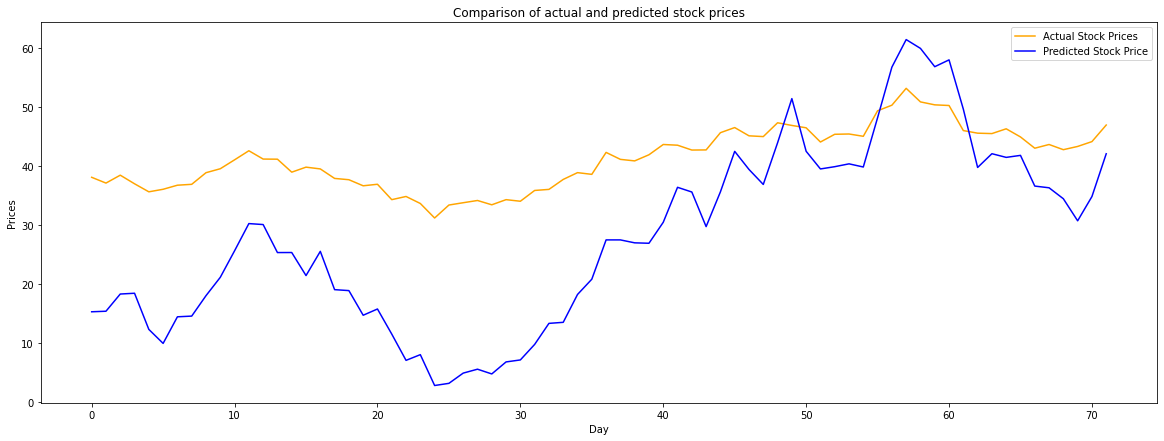

In [53]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='blue',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Ensemble learning Model

In [54]:
RF_1=RandomForestRegressor()
XGB_1=XGBRegressor()

In [55]:
Hyib = VotingRegressor( estimators= [('RF',RF_1),('XGB',XGB_1)])
Hyib= Hyib.fit(X_train , y_train)
Hyib

VotingRegressor(estimators=[('RF', RandomForestRegressor()),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          ra

# Evaluation Measures on Test data

# R2

In [56]:
y_pred_test = Hyib.predict(X_test)
Hyib_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(Hyib_test_rs,3))

R Squared :  -9.448


# MSE

In [57]:
Hyib_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(Hyib_test_mse,3))

Mean Squared Error:  267.363


# MAE

In [58]:
Hyib_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(Hyib_test_MAE,3))

Mean Absolute Error:  14.434


# Predictions and Actual Stock Price

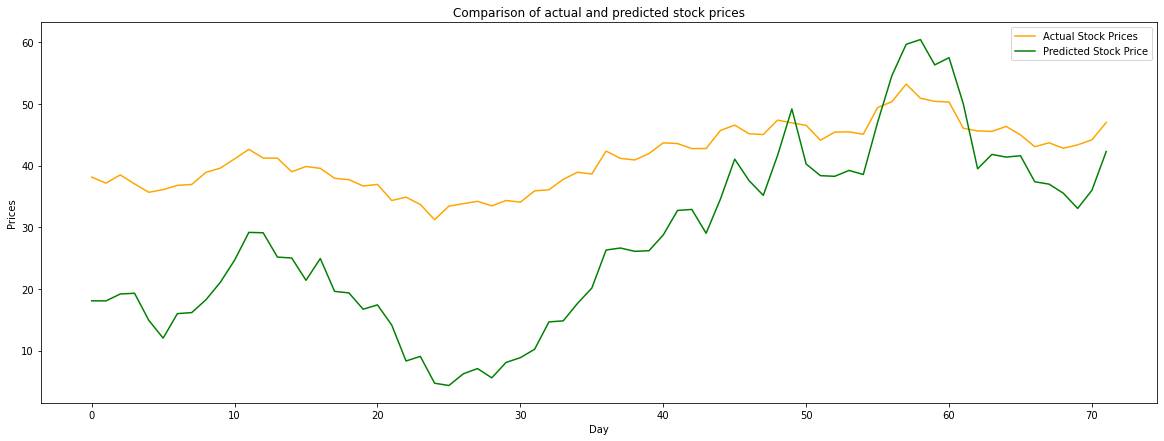

In [59]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='green',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# RNN Model

# ------------------------------------------------------------------------------------------------------

In [60]:
def RNN_model():
    RNN = Sequential()
    RNN.add(Dense(64,input_shape=(31,)))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(64))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(1))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    return RNN
RNN_model=RNN_model()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2048      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [61]:
RNN_model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 458.6960
Epoch 2/100
1/1 [==============================] - 0s 1000us/step - loss: 430.8315
Epoch 3/100
1/1 [==============================] - 0s 1000us/step - loss: 393.7193
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 350.8230
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 301.1357
Epoch 6/100
1/1 [==============================] - 0s 999us/step - loss: 234.0497
Epoch 7/100
1/1 [==============================] - 0s 999us/step - loss: 226.8490
Epoch 8/100
1/1 [==============================] - 0s 999us/step - loss: 220.6178
Epoch 9/100
1/1 [==============================] - 0s 996us/step - loss: 227.9182
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 209.9324
Epoch 11/100
1/1 [==============================] - 0s 1000us/step - loss: 195.0897
Epoch 12/100
1/1 [==============================] - 0s 999us/step - loss: 162.3807
Epoch 13/100
1/1 [

### R2

In [62]:
y_pred_test = RNN_model.predict(X_test)
RNN_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(RNN_test_rs,3))

R Squared :  -16.2


### MSE

In [63]:
RNN_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(RNN_test_mse,3))

Mean Squared Error:  440.127


### MAE

In [64]:
RNN_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(RNN_test_MAE,3))

Mean Absolute Error:  19.348


# Predictions and Actual Stock Price

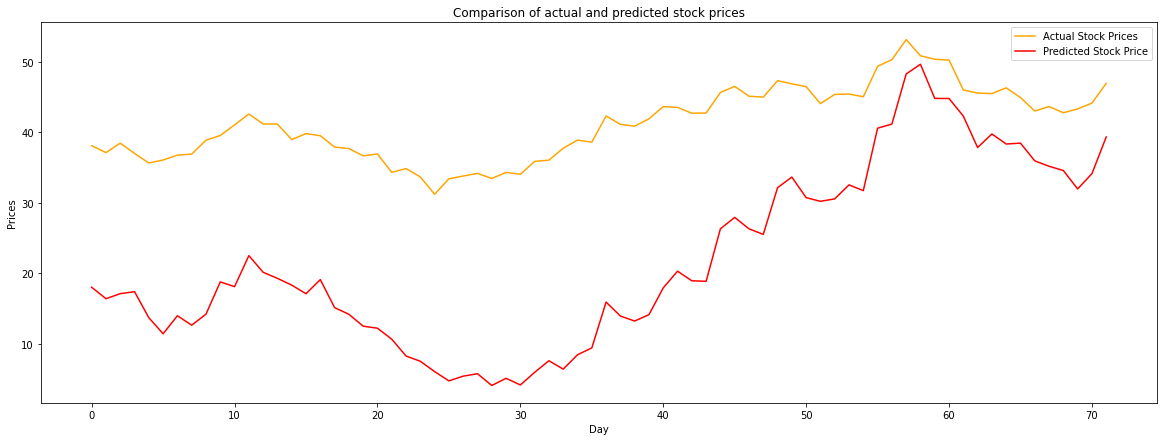

In [65]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='red',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results on R2 score

In [66]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "R2 Score"]


x.add_row(["Random Forest Algorithm", round(rf_test_rs,3)])
x.add_row(["XGB Algorithm",  round(xgb_test_rs,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_rs,3)])
x.add_row(["Neural Network Model", round(RNN_test_rs,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+----------+
|            Model            | R2 Score |
+-----------------------------+----------+
|   Random Forest Algorithm   |  -8.743  |
|        XGB Algorithm        | -10.104  |
| Ensemble Learning Algorithm |  -9.448  |
|     Neural Network Model    |  -16.2   |
+-----------------------------+----------+




# Comparison of all algorithms Results on MSE score

In [67]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MSE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_mse,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_mse,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_mse,3)])
x.add_row(["Neural Network Model", round(RNN_test_mse,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+-----------+
|            Model            | MSE score |
+-----------------------------+-----------+
|   Random Forest Algorithm   |  249.309  |
|        XGB Algorithm        |  284.143  |
| Ensemble Learning Algorithm |  267.363  |
|     Neural Network Model    |  440.127  |
+-----------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [68]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MAE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_MAE,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_MAE,3)])
x.add_row(["Ensemble Learning Model",  round(Hyib_test_MAE,3)])
x.add_row(["Neural Network Model", round(RNN_test_MAE,3)])

print(x)
print('\n')



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
| Random Forest Algorithm |   14.09   |
|      XGB Algorithm      |   14.604  |
| Ensemble Learning Model |   14.434  |
|   Neural Network Model  |   19.348  |
+-------------------------+-----------+




# Graph of MSE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

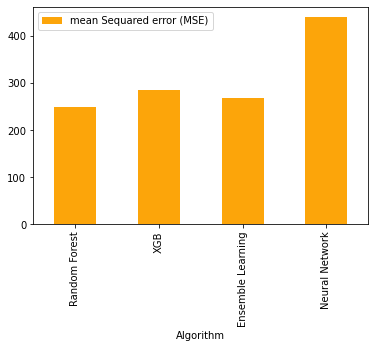

In [69]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'mean Sequared error (MSE)': [rf_test_mse]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean Sequared error (MSE)': [XGB_test_mse]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean Sequared error (MSE)': [Hyib_test_mse]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean Sequared error (MSE)': [RNN_test_mse]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of R2 of each algorithm

<AxesSubplot:xlabel='Algorithm'>

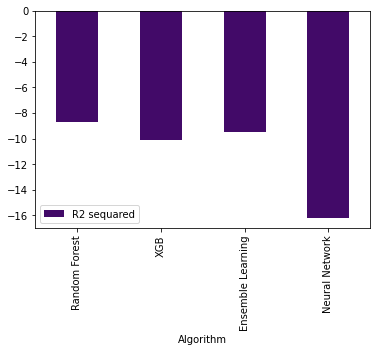

In [70]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'R2 sequared': [rf_test_rs]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'R2 sequared': [xgb_test_rs]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'R2 sequared': [Hyib_test_rs]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'R2 sequared': [RNN_test_rs]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of MAE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

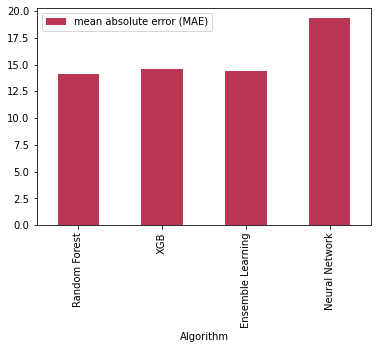

In [71]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'],'mean absolute error (MAE)': [rf_test_MAE]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean absolute error (MAE)': [XGB_test_MAE]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean absolute error (MAE)': [Hyib_test_MAE]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean absolute error (MAE)': [RNN_test_MAE]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# Time-Series Analysis per Store Type

### Seasonality of Close price

<AxesSubplot:xlabel='Date'>

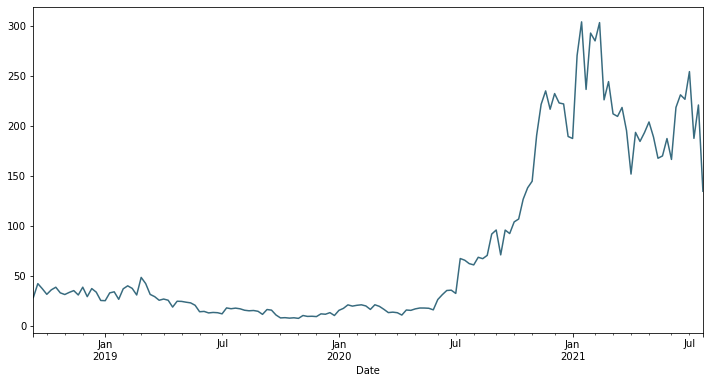

In [72]:
data['Close'] = data['Close'] * 1.0
close_1 = data['Close']
f, (ax1) = plt.subplots(1, figsize = (12, 6))
c = '#386B7F'
close_1.resample('W').sum().plot(color = c, ax = ax1)

### Stationarize the Close price data

In [73]:
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [74]:
def residual_plot(model):
    resid = model.resid
    print(normaltest(resid))
    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)
    sns.distplot(resid ,fit = stats.norm, ax = ax0)
    (mu, sigma) = stats.norm.fit(resid)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

### Close price with rolling windows

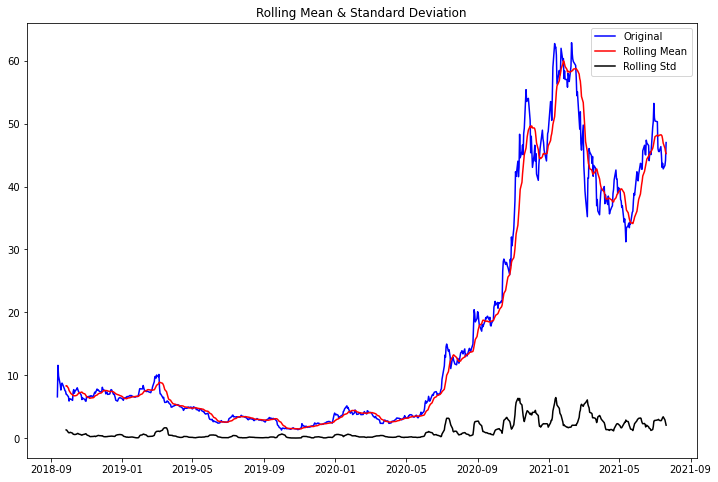

Results of Dickey-Fuller Test:
p-value = 0.9330. The series is likely non-stationary.
Test Statistic                  -0.244845
p-value                          0.932961
#Lags Used                       7.000000
Number of Observations Used    711.000000
Critical Value (1%)             -3.439581
Critical Value (5%)             -2.865614
Critical Value (10%)            -2.568939
dtype: float64


In [75]:
test_stationarity(close_1)

We are going to make data as stationary. So we want to do is take a first difference of the data and it will help to eliminate the overall trend from the data.

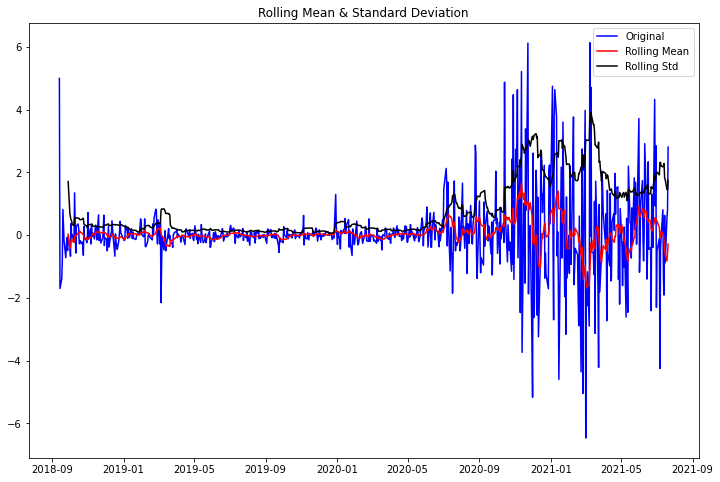

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.159392
p-value                          0.000011
#Lags Used                      20.000000
Number of Observations Used    697.000000
Critical Value (1%)             -3.439767
Critical Value (5%)             -2.865696
Critical Value (10%)            -2.568983
dtype: float64


In [76]:
first_diff_a = close_1 - close_1.shift(1)
first_diff_a = first_diff_a.dropna(inplace = False)
test_stationarity(first_diff_a, window = 12)

### Plots of ACF and PACF

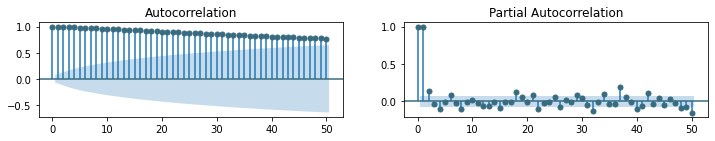

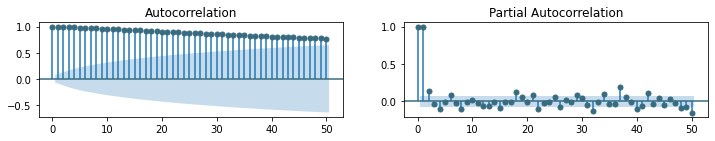

In [77]:
plt.figure(figsize = (12, 8))
plt.subplot(421); plot_acf(close_1, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(close_1, lags = 50, ax = plt.gca(), color = c)

### Sarima Model

In [78]:
arima_mod = sm.tsa.ARIMA(close_1, (11,1,0)).fit(disp=False)
print(arima_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  718
Model:                ARIMA(11, 1, 0)   Log Likelihood               -1136.854
Method:                       css-mle   S.D. of innovations              1.178
Date:                Wed, 21 Jul 2021   AIC                           2299.708
Time:                        22:15:35   BIC                           2359.202
Sample:                             1   HQIC                          2322.678
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0571      0.044      1.286      0.198      -0.030       0.144
ar.L1.D.Close     -0.0675      0.038     -1.783      0.075      -0.142       0.007
ar.L2.D.Close      0.1118      0.038

NormaltestResult(statistic=156.37570171006865, pvalue=1.1052176752690645e-34)


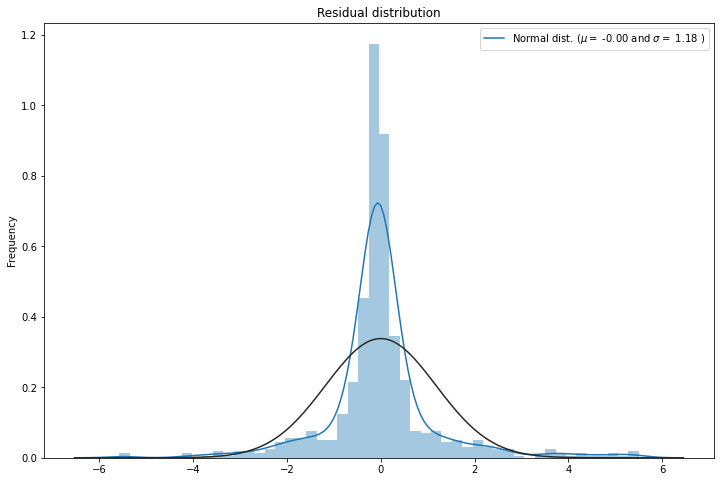

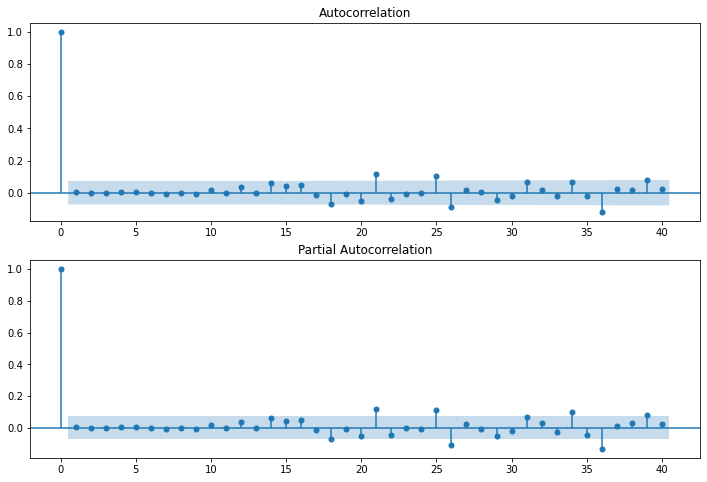

In [79]:
residual_plot(arima_mod)

### SARIMA Model

In [80]:
sarima_mod = sm.tsa.statespace.SARIMAX(close_1, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                  719
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1230.781
Date:                             Wed, 21 Jul 2021   AIC                           2489.563
Time:                                     22:15:46   BIC                           2553.397
Sample:                                          0   HQIC                          2514.229
                                             - 719                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0717      0.023     -3.118      0.002      -0.117      -0.027
ar.L2          0.1169      

NormaltestResult(statistic=103.92199424674682, pvalue=2.714098938168222e-23)


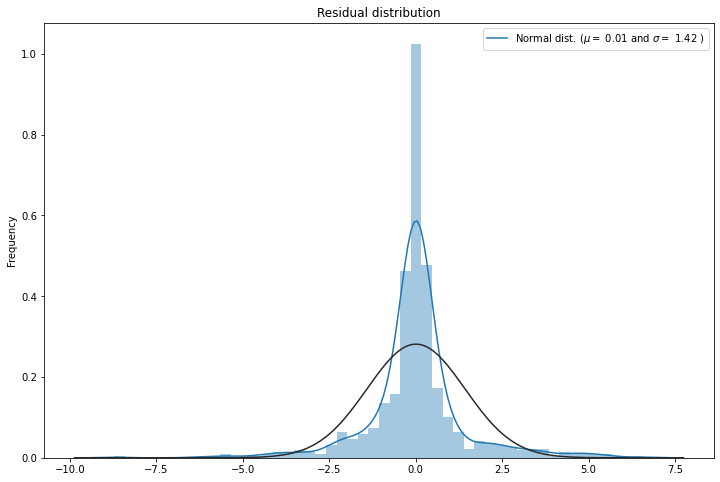

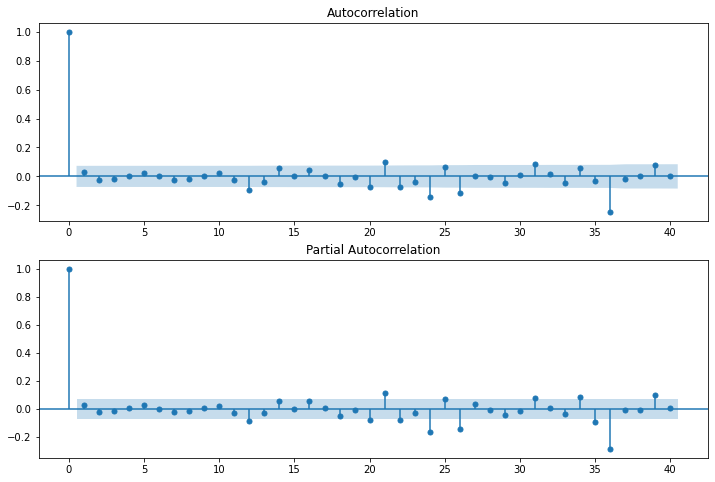

In [81]:
residual_plot(sarima_mod)

# In progress . . . 